# watFinder tutorial

## Introduction

This tutorial shows how to detect water molecules that might form 
hydrogen bonds with protein structures (called water bridges).
The prediction method introduced here helps evaluate the significance 
of water molecules on the stability of protein structure. 

### Required Programs

Latest version of ProDy_ is required.

### Recommended Programs

Besides ProDy_, the Matplotlib_ library and VMD_ program are required for
some steps in the tutorial. IPython_ is highly recommended for interactive usage.

Moreover, in the case of the lack of hydrogen atoms in protein structure,
additional package such as Openbabel_ or PDBfixer_ are required for
predicting hydrogen bonds.

.. _Openbabel: https://github.com/openbabel

.. _PDBfixer: https://github.com/openmm/pdbfixer

### Getting Started

We recommend that you will follow this tutorial by typing commands in an
IPython session, e.g.::

  $ ipython

or with pylab environment::

  $ ipython --pylab


First, we will make necessary imports from ProDy and Matplotlib packages.

In [1]:
from prody import *
from pylab import *
import matplotlib

We have included these imports in every part of the tutorial, so that
code copied from the online pages is complete. You do not need to repeat
imports in the same Python session.

--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

## Protein preparation

Because in PDB structures we will have water molecules without 
hydrogens we would have to add them. We can use :func:`.addMissingAtoms` 
function. This function use either *Openbabel* or *PDBFixer* and both 
packages required PDB file saved in the local directory. Those are 
external packages therefore they should be installed 
independently. 

How to install them can be found in :class:`.Interactions`.
We can also directly provide PDB structure with hydrogens added by other 
software.

Here we will fetch PDB structure with LMW-PTP **5kqm** from 
Protein Data Bank (PDB) in incompressed form using *compressed=False* 
and add missing atoms using :func:`.addMissingAtoms`:

In [2]:
pdb = '5kqm'
filename = fetchPDB(pdb, compressed=False)

@> PDB file is found in working directory (5kqm.pdb).


In [3]:
filename2 = addMissingAtoms(filename)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is 5kqm.pdb)

@> Hydrogens were added to the structure. Structure addH_5kqm.pdb is saved in the local directry.


A new file with hydrogens is now created. It will contain *'addH_'* as 
a prefix. For protein structures that don't contain hydrogens, 
results will also be computed without applying angle criteria.

--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

## *Water bridges detection in a single PDB structure*

### Water bridges prediction

To analyze the structure we need to parse a structure **addH_5kqm.pdb**
using :func:`.parsePDB`:

In [4]:
atoms = parsePDB(filename2)

@> 2815 atoms and 1 coordinate set(s) were parsed in 0.04s.


Before analysis, we can check how many water molecules are present in our PDB 
structure and later compare how many of them were meaningful for protein structure:

In [5]:
water_molecules = atoms.select('water')
len(water_molecules)

363

Next, we can use :func:`.calcWaterBridges` and one out of two methods to detect 
water bridges, *'chain'* or *'cluster'*:

1. **Method 'chain' (default)** which will detect water molecules between pairs of 
hydrophilic residues:

In [6]:
waterBridges_chain = calcWaterBridges(atoms)

@> 47 water bridges detected using method chain.
@> THR5 O_3 A ASP86 OD2_641 A 4.091327168535904 1 ['A_1316']
@> THR5 O_3 A SER7 OG_21 A 5.3652796758417 1 ['A_1316']
@> THR5 O_3 A LYS110 NZ_838 A 6.2255144365747 1 ['A_1316']
@> SER7 OG_21 A ARG40 NH1_285 A 4.900955519079926 1 ['A_1289']
@> SER7 OG_21 A ASP86 OD2_641 A 3.379157587328534 1 ['A_1316']
@> SER7 OG_21 A LYS110 NZ_838 A 4.70722699686344 1 ['A_1316']
@> ARG18 NH2_105 A ASN95 ND2_714 A 4.570361692470302 1 ['A_1261']
@> ARG18 NH2_105 A ASP92 OD1_690 A 5.373355841557489 1 ['A_1261']
@> PRO20 O_115 A GLU23 OE1_139 A 4.571172934816621 1 ['A_1292']
@> GLU23 OE1_139 A GLU23 OE2_140 A 2.206470711339718 1 ['A_1244']
@> GLU23 OE1_139 A HIS72 ND1_523 A 3.2114691342125647 1 ['A_1244']
@> GLU23 OE2_140 A HIS72 ND1_523 A 4.127239392136104 1 ['A_1244']
@> ARG27 NH1_173 A SER71 N_511 A 6.128045528551498 1 ['A_1319']
@> ARG27 NH2_174 A VAL41 N_287 A 4.642634596864156 1 ['A_1339']
@> THR31 O_202 A SER36 N_239 A 5.2804292439156875 1 ['A_1277']
@

2. **Method 'cluster'** which will detect water molecules between multiple hydrophilic 
residues:

These results may vary slightly depending on the position of added hydrogen atoms.

In [7]:
waterBridges_cluster = calcWaterBridges(atoms, method='cluster')

@> 48 water bridges detected using method cluster.
@> ASP86 OD2_641 A THR5 O_3 A LYS110 NZ_838 A SER7 OG_21 A 4.091327168535904 4.910793418583194 3.379157587328534 6.2255144365747 5.3652796758417 4.70722699686344 1 ['A_1316']
@> SER7 OG_21 A ARG40 NH1_285 A 4.900955519079926 1 ['A_1289']
@> ARG18 NH2_105 A ASN95 ND2_714 A ASP92 OD1_690 A 4.570361692470302 5.373355841557489 3.3343465626716116 2 ['A_1261', 'A_1300']
@> PRO20 O_115 A GLU23 OE1_139 A 4.571172934816621 1 ['A_1292']
@> HIS72 ND1_523 A GLU23 OE2_140 A GLU23 OE1_139 A 4.127239392136104 3.2114691342125647 2.206470711339718 1 ['A_1244']
@> HIS72 ND1_523 A GLU23 OE2_140 A GLU23 OE1_139 A 4.127239392136104 3.2114691342125647 2.206470711339718 1 ['A_1244']
@> SER71 N_511 A ARG27 NH1_173 A 6.128045528551498 1 ['A_1319']
@> ARG27 NH2_174 A VAL41 N_287 A 4.642634596864156 1 ['A_1339']
@> THR31 O_202 A SER36 N_239 A 5.2804292439156875 1 ['A_1277']
@> ASN34 O_226 A GLU37 N_245 A SER36 N_239 A 5.121298761056614 4.059546895898606 2.743692

*'Chain' method* detected **42** water bridges and *'Cluster' method* second **49**. 
The total number of water molecules in the crystal structure is **363**. As we can 
see, many of them are not meaningful for the protein stability.

### Save results in PDB file:

We can use :func:`.savePDBWaterBridges` to save the results in PDB file. File will 
contain water molecules that are forming potential hydrogen bridges and protein 
structure. Residues involved in water bridges can be displayed using occupancy column.

In [8]:
savePDBWaterBridges(waterBridges_cluster, atoms, filename2[:-4]+'_wb_cluster.pdb')
savePDBWaterBridges(waterBridges_chain, atoms, filename2[:-4]+'_wb_chain.pdb')

'addH_5kqm_wb_chain.pdb'

The results can be displayed in VMD. Below we can see a comparison between
results obtained by 'chain' vs 'cluster' (additional molecules shown in
green) method.

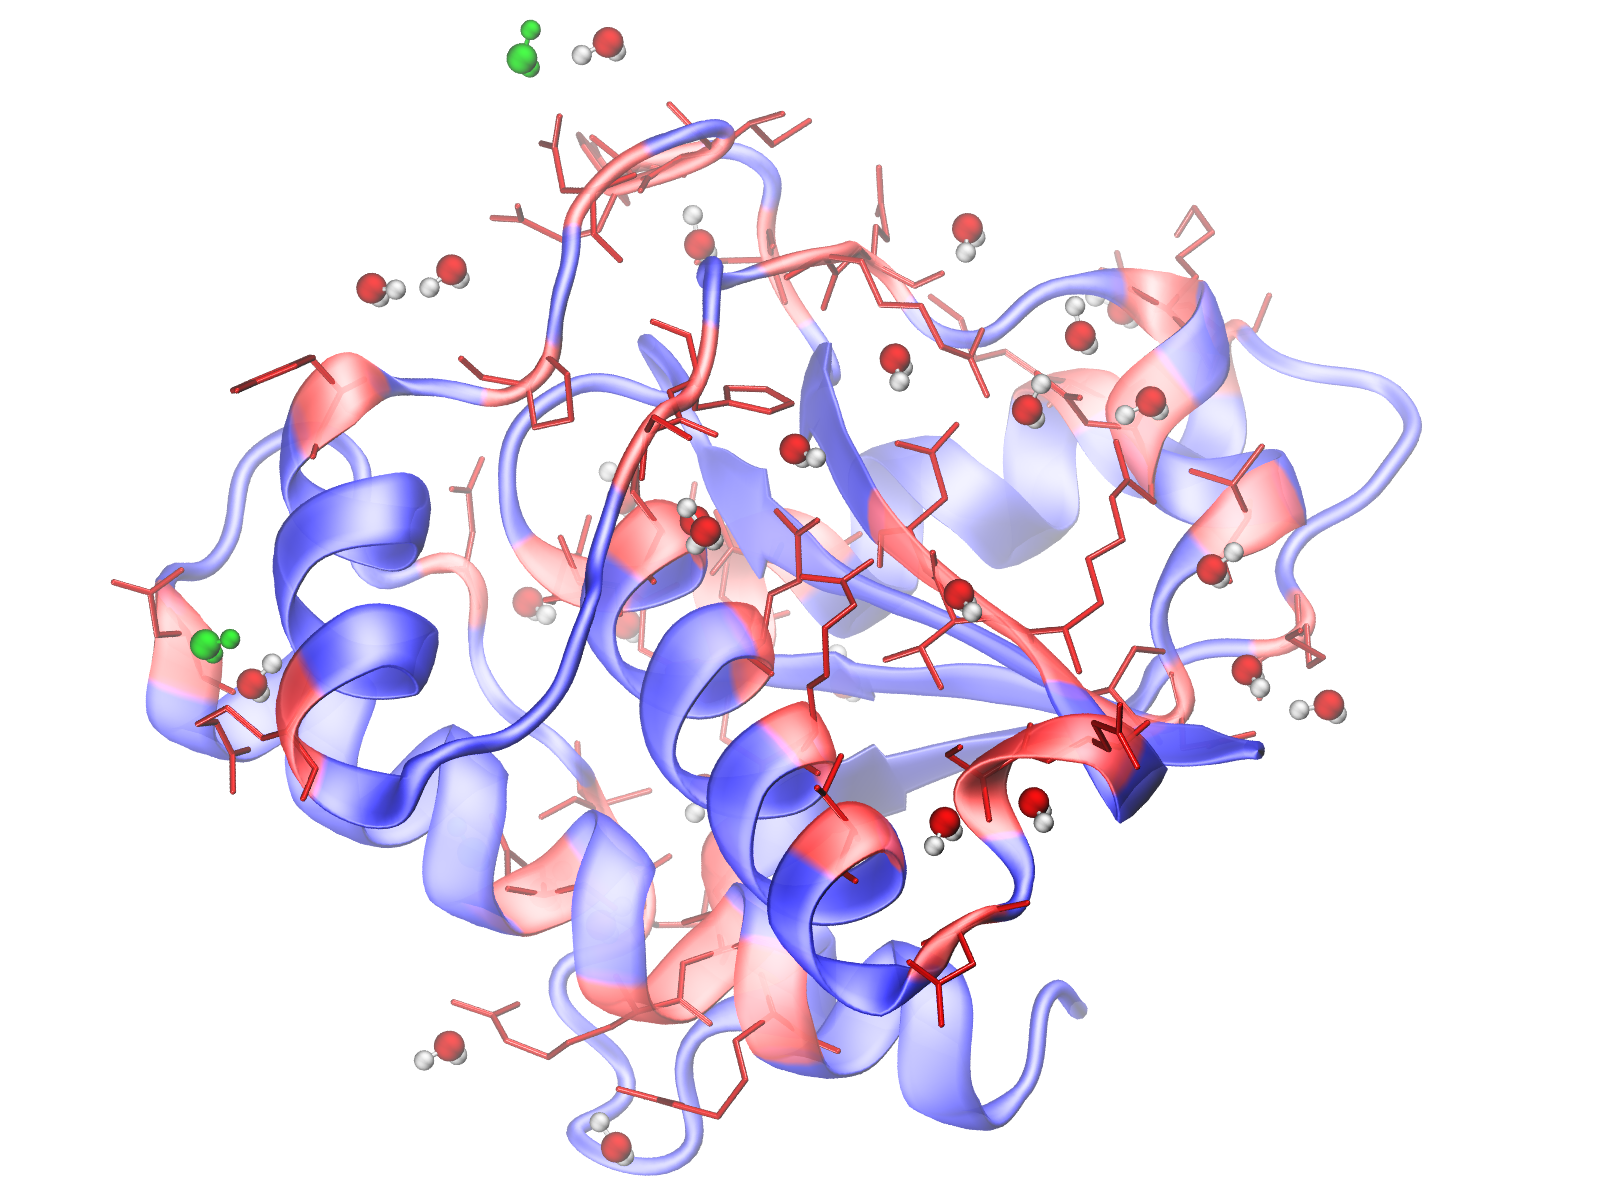

In [9]:
from IPython.display import Image 
Image('./Fig1.png', width=600)

### Access to the raw data

To have access to the raw data, we need to include an 
additional parameter *ouput='info'* in :func:`.calcWaterBridges`.

The atomic output can also be transformed to this 
detailed information using :func:`.getWaterBridgesInfoOutput`.

In [10]:
waterBridges_cluster = calcWaterBridges(atoms, method='cluster', output='info')
waterBridges_cluster

@> 48 water bridges detected using method cluster.
@> ASP86 OD2_641 A THR5 O_3 A LYS110 NZ_838 A SER7 OG_21 A 4.091327168535904 4.910793418583194 3.379157587328534 6.2255144365747 5.3652796758417 4.70722699686344 1 ['A_1316']
@> SER7 OG_21 A ARG40 NH1_285 A 4.900955519079926 1 ['A_1289']
@> ARG18 NH2_105 A ASN95 ND2_714 A ASP92 OD1_690 A 4.570361692470302 5.373355841557489 3.3343465626716116 2 ['A_1261', 'A_1300']
@> PRO20 O_115 A GLU23 OE1_139 A 4.571172934816621 1 ['A_1292']
@> HIS72 ND1_523 A GLU23 OE2_140 A GLU23 OE1_139 A 4.127239392136104 3.2114691342125647 2.206470711339718 1 ['A_1244']
@> HIS72 ND1_523 A GLU23 OE2_140 A GLU23 OE1_139 A 4.127239392136104 3.2114691342125647 2.206470711339718 1 ['A_1244']
@> SER71 N_511 A ARG27 NH1_173 A 6.128045528551498 1 ['A_1319']
@> ARG27 NH2_174 A VAL41 N_287 A 4.642634596864156 1 ['A_1339']
@> THR31 O_202 A SER36 N_239 A 5.2804292439156875 1 ['A_1277']
@> ASN34 O_226 A GLU37 N_245 A SER36 N_239 A 5.121298761056614 4.059546895898606 2.743692

[['ASP86',
  'OD2_641',
  'A',
  'THR5',
  'O_3',
  'A',
  'LYS110',
  'NZ_838',
  'A',
  'SER7',
  'OG_21',
  'A',
  4.091327168535904,
  4.910793418583194,
  3.379157587328534,
  6.2255144365747,
  5.3652796758417,
  4.70722699686344,
  1,
  ['A_1316']],
 ['SER7',
  'OG_21',
  'A',
  'ARG40',
  'NH1_285',
  'A',
  4.900955519079926,
  1,
  ['A_1289']],
 ['ARG18',
  'NH2_105',
  'A',
  'ASN95',
  'ND2_714',
  'A',
  'ASP92',
  'OD1_690',
  'A',
  4.570361692470302,
  5.373355841557489,
  3.3343465626716116,
  2,
  ['A_1261', 'A_1300']],
 ['PRO20',
  'O_115',
  'A',
  'GLU23',
  'OE1_139',
  'A',
  4.571172934816621,
  1,
  ['A_1292']],
 ['HIS72',
  'ND1_523',
  'A',
  'GLU23',
  'OE2_140',
  'A',
  'GLU23',
  'OE1_139',
  'A',
  4.127239392136104,
  3.2114691342125647,
  2.206470711339718,
  1,
  ['A_1244']],
 ['HIS72',
  'ND1_523',
  'A',
  'GLU23',
  'OE2_140',
  'A',
  'GLU23',
  'OE1_139',
  'A',
  4.127239392136104,
  3.2114691342125647,
  2.206470711339718,
  1,
  ['A_1244']],
 

The distances are between combinations of protein atoms. 2 atoms gives 1 distance, 
3 atoms gives 3 distances, 4 atoms gives 6 distances, etc.

In [11]:
waterBridges_chain = calcWaterBridges(atoms, output='info')

@> 47 water bridges detected using method chain.
@> THR5 O_3 A ASP86 OD2_641 A 4.091327168535904 1 ['A_1316']
@> THR5 O_3 A SER7 OG_21 A 5.3652796758417 1 ['A_1316']
@> THR5 O_3 A LYS110 NZ_838 A 6.2255144365747 1 ['A_1316']
@> SER7 OG_21 A ARG40 NH1_285 A 4.900955519079926 1 ['A_1289']
@> SER7 OG_21 A ASP86 OD2_641 A 3.379157587328534 1 ['A_1316']
@> SER7 OG_21 A LYS110 NZ_838 A 4.70722699686344 1 ['A_1316']
@> ARG18 NH2_105 A ASN95 ND2_714 A 4.570361692470302 1 ['A_1261']
@> ARG18 NH2_105 A ASP92 OD1_690 A 5.373355841557489 1 ['A_1261']
@> PRO20 O_115 A GLU23 OE1_139 A 4.571172934816621 1 ['A_1292']
@> GLU23 OE1_139 A GLU23 OE2_140 A 2.206470711339718 1 ['A_1244']
@> GLU23 OE1_139 A HIS72 ND1_523 A 3.2114691342125647 1 ['A_1244']
@> GLU23 OE2_140 A HIS72 ND1_523 A 4.127239392136104 1 ['A_1244']
@> ARG27 NH1_173 A SER71 N_511 A 6.128045528551498 1 ['A_1319']
@> ARG27 NH2_174 A VAL41 N_287 A 4.642634596864156 1 ['A_1339']
@> THR31 O_202 A SER36 N_239 A 5.2804292439156875 1 ['A_1277']
@

We can check which residues are involved in water bridges using the code below. 
First we need to extract residues names and display them without repetitions.

In [12]:
allresidues = []

for i in waterBridges_chain:
    allresidues.append(i[0])
    allresidues.append(i[3])

import numpy as np
allresidues_once = np.unique(allresidues)
allresidues_once

array(['ARG147', 'ARG150', 'ARG18', 'ARG27', 'ARG40', 'ARG65', 'ARG75',
       'ASN34', 'ASN53', 'ASN95', 'ASP129', 'ASP135', 'ASP42', 'ASP81',
       'ASP86', 'ASP92', 'CYS148', 'GLN105', 'GLN144', 'GLN76', 'GLU23',
       'GLU37', 'GLU50', 'GLU93', 'GLY117', 'HIS72', 'ILE126', 'ILE51',
       'LEU125', 'LYS102', 'LYS110', 'LYS79', 'PRO20', 'SER136', 'SER36',
       'SER47', 'SER7', 'SER71', 'SER94', 'THR140', 'THR31', 'THR5',
       'THR84', 'TYR131', 'TYR132', 'TYR49', 'VAL41'], dtype='<U6')

We can also count how many times each residue was involved in water bridges 
(with different waters) and display the number of counts as a histogram.

In [13]:
from collections import Counter
aa_counter = Counter(allresidues)
sorted_aa_counter = dict(sorted(aa_counter.items(), key=lambda item: item[1], reverse=True))
sorted_aa_counter

{'GLU23': 5,
 'SER7': 4,
 'ARG40': 4,
 'ASP81': 4,
 'ARG65': 4,
 'THR5': 3,
 'ASP86': 3,
 'LYS110': 3,
 'ASP92': 3,
 'SER36': 3,
 'ASP42': 3,
 'GLU50': 3,
 'ARG18': 2,
 'ASN95': 2,
 'HIS72': 2,
 'ARG27': 2,
 'ASN34': 2,
 'GLU37': 2,
 'THR84': 2,
 'SER47': 2,
 'TYR49': 2,
 'TYR131': 2,
 'ASP135': 2,
 'LYS79': 2,
 'GLN105': 2,
 'LYS102': 2,
 'LEU125': 2,
 'ARG147': 2,
 'ARG150': 2,
 'PRO20': 1,
 'SER71': 1,
 'VAL41': 1,
 'THR31': 1,
 'ILE51': 1,
 'ASN53': 1,
 'ARG75': 1,
 'GLN76': 1,
 'ASP129': 1,
 'GLU93': 1,
 'SER94': 1,
 'GLY117': 1,
 'ILE126': 1,
 'TYR132': 1,
 'SER136': 1,
 'THR140': 1,
 'GLN144': 1,
 'CYS148': 1}

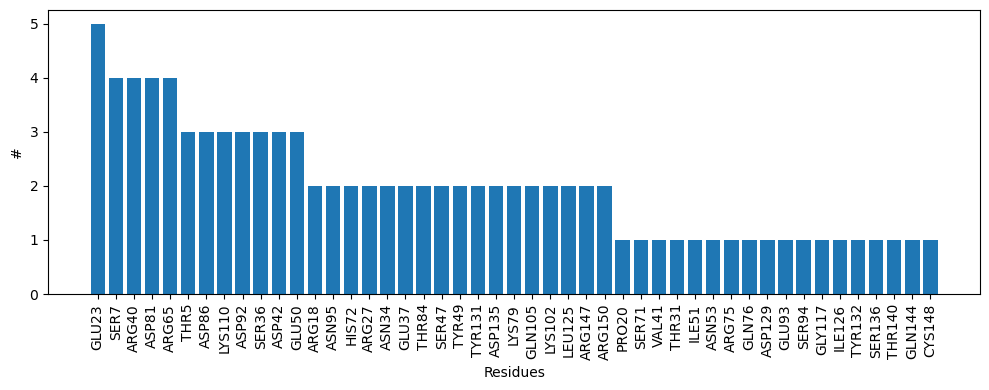

In [14]:
import matplotlib.pyplot as plt

values = list(sorted_aa_counter.values())
labels = list(sorted_aa_counter.keys())

plt.figure(figsize=(10, 4))
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel('Residues')
plt.ylabel('#')
plt.tight_layout()
plt.show()

Based on the results we can see that there is one residue, GLU23, which 
participates often in the interactions with water molecules.

There are also options to save the output, which is especially important 
for trajectories and is described there.

--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

## *Water bridges detection in a trajectory*

Now, we will perform calculations for a trajectory file. We will use 
:func:`.calcWaterBridgesTrajectory` for which we need to provide PDB and DCD file.

We will use files that were prepared in NAMD. The system (protein in a water box) 
can be found in *5kqm_all_sci.pdb*. Trajectory, *NAMD_D2_sample.dcd*, has dcd format.

### Parse structure with trajectory

In [15]:
PDBtraj_file = "5kqm_all_sci.pdb"
coords_traj = parsePDB(PDBtraj_file)
trajectory = parseDCD("NAMD_D2_sample.dcd")

@> 19321 atoms and 1 coordinate set(s) were parsed in 0.27s.
@> DCD file contains 17 coordinate sets for 19321 atoms.
@> DCD file was parsed in 0.01 seconds.
@> 3.76 MB parsed at input rate 740.06 MB/s.
@> 17 coordinate sets parsed at input rate 3345 frame/s.


The analysis od water bridges can be performed on selected frames by using 
*start_frame* or *stop_frame*.

In [16]:
wb_traj = calcWaterBridgesTrajectory(coords_traj, trajectory, start_frame=5, 
                                        stop_frame=15, output='info')

@> Frame: 5
@> 101 water bridges detected using method chain.
@> Frame: 6
@> 107 water bridges detected using method chain.
@> Frame: 7
@> 90 water bridges detected using method chain.
@> Frame: 8
@> 97 water bridges detected using method chain.
@> Frame: 9
@> 122 water bridges detected using method chain.
@> Frame: 10
@> 101 water bridges detected using method chain.
@> Frame: 11
@> 130 water bridges detected using method chain.
@> Frame: 12
@> 132 water bridges detected using method chain.
@> Frame: 13
@> 126 water bridges detected using method chain.
@> Frame: 14
@> 88 water bridges detected using method chain.
@> Frame: 15
@> 105 water bridges detected using method chain.


Because of the amount of data there, detailed results will not be displayed. 
We instead access the raw data from using *output='info'*.

In [17]:
wb_traj

[[['THR5',
   'OG1_8',
   'P',
   'TRP39',
   'NE1_547',
   'P',
   3.261452627054999,
   1,
   ['W_13313']],
  ['THR5',
   'O_15',
   'P',
   'ASP86',
   'OD1_1269',
   'P',
   5.986350034086454,
   2,
   ['W_12974', 'W_18431']],
  ['THR5',
   'O_15',
   'P',
   'LYS110',
   'NZ_1667',
   'P',
   7.375256709599827,
   2,
   ['W_12974', 'W_18431']],
  ['THR5',
   'O_15',
   'P',
   'LYS6',
   'NZ_32',
   'P',
   6.414308925017051,
   2,
   ['W_12974', 'W_12152']],
  ['LYS6',
   'NZ_32',
   'P',
   'TYR87',
   'OH_1286',
   'P',
   4.891713264838611,
   1,
   ['W_9209']],
  ['LYS6',
   'NZ_32',
   'P',
   'ASP86',
   'O_1272',
   'P',
   6.000079664458025,
   2,
   ['W_7319', 'W_17114']],
  ['GLY14',
   'O_156',
   'P',
   'GLU50',
   'O_711',
   'P',
   4.4703701847403154,
   1,
   ['W_14210']],
  ['GLY14',
   'O_156',
   'P',
   'ASN53',
   'ND2_747',
   'P',
   5.847016041542153,
   1,
   ['W_14210']],
  ['ARG18',
   'NH1_217',
   'P',
   'ASP129',
   'N_1970',
   'P',
   4.176516917

### Save the results

The results can be saved using :func:`.saveWaterBridges` in two formats. Txt 
file will contain all the results for analysis and can be visualized in text 
editor, and wb file will restore data for further analysis. It can be loaded 
using :func:`.parseWaterBridges` as shown below.

First, we have to rerun the calculation without *output='info'*. 

We can suppress the logged output using :func:`.confProDy` to set the verbosity 
to *'none'*.

In [18]:
confProDy(verbosity='none')
wb_traj = calcWaterBridgesTrajectory(coords_traj, trajectory, 
                                        stop_frame=15)

@> ProDy is configured: verbosity='none'


In [19]:
saveWaterBridges(wb_traj,'wb_saved.txt')
saveWaterBridges(wb_traj,'wb_saved.wb')

To load wb file use :func:`.parseWaterBridges` and protein coordinates 
as follows:

In [20]:
waterBridges = parseWaterBridges('wb_saved.wb', coords_traj)

Loaded results from a .wb file are of type atomic and therefore can be used for 
analysis later. 

### Analysis of the results

### Information about residues contributing to water bridges

Analysis of the data can be performed using :func:`.calcWaterBridgesStatistics`.
The analysis presented below gives information about pairs of residues involved 
in water bridges, how often they occur, and the average distance between them. 
Standard deviation provides information on how the distance was changing during 
the simulation. Additionally, the analysis can be saved by using *filename* option.

We can recover logged output using :func:`.confProDy` again with a different verbosity.

In [21]:
confProDy(verbosity='debug')
analysisAtomic = calcWaterBridgesStatistics(waterBridges, trajectory, 
                                        filename='data.txt')

@> RES1           RES2           PERC      DIST_AVG  DIST_STD  
@> ARG40P         SER7P          12.500    4.901     0.000     
@> ASP92P         ARG18P         68.750    4.285     1.159     
@> ASN95P         ARG18P         68.750    5.099     1.192     
@> GLU23P         PRO20P         12.500    4.571     0.000     
@> HIS72P         GLU23P         12.500    3.669     0.458     
@> VAL41P         ARG27P         56.250    5.565     0.781     
@> SER71P         ARG27P         75.000    6.116     0.445     
@> ASN34P         ASP32P         25.000    4.218     0.652     
@> GLU37P         SER36P         75.000    3.700     1.154     
@> THR84P         ARG40P         50.000    4.235     0.671     
@> ARG75P         ASP42P         68.750    3.159     0.652     
@> ASN95P         THR46P         62.500    4.067     0.842     
@> TYR49P         SER47P         50.000    4.320     0.757     
@> GLU50P         SER47P         37.500    6.161     1.070     
@> GLU50P         TYR49P         68.750 

@> TYR87P         LYS6P          12.500    5.035     0.143     
@> ASP129P        CYS17P         6.250     5.459     0.000     
@> ARG58P         CYS17P         12.500    5.532     0.887     
@> TYR132P        CYS17P         6.250     7.017     0.000     
@> SER36P         ARG27P         56.250    7.367     0.987     
@> ASP32P         LYS28P         37.500    2.775     0.057     
@> LEU29P         LYS28P         6.250     6.077     0.000     
@> ASP32P         LEU29P         6.250     4.390     0.000     
@> ARG150P        GLN33P         18.750    5.345     1.428     
@> THR78P         ARG40P         6.250     8.231     0.000     
@> GLU80P         ARG40P         12.500    6.088     0.707     
@> HIS72P         ASP42P         37.500    5.850     0.841     
@> GLY48P         SER47P         31.250    3.400     0.585     
@> LYS102P        SER47P         37.500    5.020     1.225     
@> ASP98P         TYR49P         6.250     6.657     0.000     
@> ASP129P        ARG58P         6.250  

@> SER43P         ASP42P         6.250     5.649     1.166     
@> ARG75P         SER43P         18.750    6.050     0.532     
@> SER61P         TYR57P         6.250     3.099     0.057     
@> ASP135P        TYR57P         6.250     8.246     0.000     
@> LYS79P         THR78P         6.250     3.417     0.000     
@> ALA156P        TYR87P         6.250     4.209     0.000     
@> ASN104P        SER103P        6.250     6.714     0.000     
@> LYS123P        ASP120P        37.500    5.390     1.288     
@> GLN122P        PRO121P        12.500    4.844     1.156     
@> ASP129P        GLU128P        12.500    6.027     0.099     
@> TYR131P        ASP129P        6.250     4.199     0.000     
@> GLN143P        THR140P        25.000    4.625     0.967     
@> ARG147P        THR140P        12.500    5.289     0.030     
@> HIS157P        ALA151P        12.500    6.711     0.466     
@> LEU153P        LYS6P          12.500    6.574     1.025     
@> GLU154P        LYS6P          6.250  

The output is a dictionary, so we can use :meth:`dict.items()` 
to inspect it.

In [22]:
for item in list(analysisAtomic.items())[:5]:
    print(item)

((40, 7), {'percentage': 12.5, 'distAvg': 4.9006157, 'distStd': 0.0})
((7, 40), {'percentage': 12.5, 'distAvg': 4.9006157, 'distStd': 0.0})
((92, 18), {'percentage': 68.75, 'distAvg': 4.2853837, 'distStd': 1.159262})
((18, 92), {'percentage': 68.75, 'distAvg': 4.2853837, 'distStd': 1.159262})
((95, 18), {'percentage': 68.75, 'distAvg': 5.0986476, 'distStd': 1.1916962})


To have easier access to the data, we can use :func:`.getWaterBridgeStatInfo`.

In [23]:
wb_stat_info = getWaterBridgeStatInfo(analysisAtomic, coords_traj)
wb_stat_info

{('ARG40P', 'SER7P'): {'percentage': 12.5,
  'distAvg': 4.9006157,
  'distStd': 0.0},
 ('SER7P', 'ARG40P'): {'percentage': 12.5,
  'distAvg': 4.9006157,
  'distStd': 0.0},
 ('ASP92P', 'ARG18P'): {'percentage': 68.75,
  'distAvg': 4.2853837,
  'distStd': 1.159262},
 ('ARG18P', 'ASP92P'): {'percentage': 68.75,
  'distAvg': 4.2853837,
  'distStd': 1.159262},
 ('ASN95P', 'ARG18P'): {'percentage': 68.75,
  'distAvg': 5.0986476,
  'distStd': 1.1916962},
 ('ARG18P', 'ASN95P'): {'percentage': 68.75,
  'distAvg': 5.0986476,
  'distStd': 1.1916962},
 ('GLU23P', 'PRO20P'): {'percentage': 12.5,
  'distAvg': 4.571081,
  'distStd': 0.0},
 ('PRO20P', 'GLU23P'): {'percentage': 12.5,
  'distAvg': 4.571081,
  'distStd': 0.0},
 ('HIS72P', 'GLU23P'): {'percentage': 12.5,
  'distAvg': 3.668869,
  'distStd': 0.45773232},
 ('GLU23P', 'HIS72P'): {'percentage': 12.5,
  'distAvg': 3.668869,
  'distStd': 0.45773232},
 ('VAL41P', 'ARG27P'): {'percentage': 56.25,
  'distAvg': 5.5646605,
  'distStd': 0.7812058},
 (

To obtain maps of interactions for protein structure, we can use 
:func:`.showWaterBridgeMatrix` which is equipted in three paramaters: 
*'percentage'* (how often two residues were forming water bridges), 
*'distAvg'* (how close there were), and *'distStd'* (how stable that 
water bridge was).

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


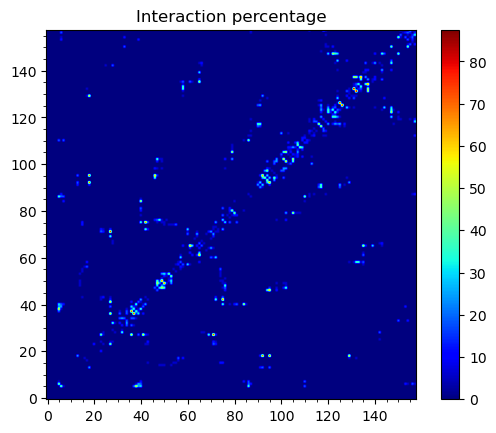

In [24]:
showWaterBridgeMatrix(analysisAtomic, 'percentage')

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


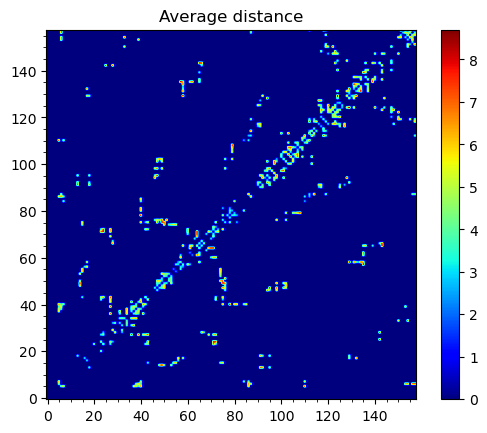

In [25]:
showWaterBridgeMatrix(analysisAtomic, 'distAvg')

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


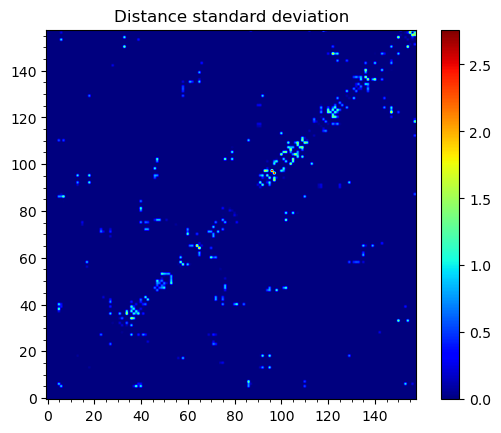

In [26]:
showWaterBridgeMatrix(analysisAtomic, 'distStd')

Raw data of the matrices can be obatined with :func:`.calcWaterBridgeMatrix`. 
The type of the matrix can be selected among: *'percentage'*, *'distAvg'*, *'distStd'*.

In [27]:
M1 = calcWaterBridgeMatrix(analysisAtomic, 'percentage')
M2 = calcWaterBridgeMatrix(analysisAtomic, 'distAvg')
M3 = calcWaterBridgeMatrix(analysisAtomic, 'distStd')

In [28]:
M1

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  , 12.5 , 31.25],
       [ 0.  ,  0.  ,  0.  , ..., 12.5 ,  0.  , 12.5 ],
       [ 0.  ,  0.  ,  0.  , ..., 31.25, 12.5 ,  0.  ]])

In [29]:
M2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 4.58851337,
        5.82083416],
       [0.        , 0.        , 0.        , ..., 4.58851337, 0.        ,
        3.52366138],
       [0.        , 0.        , 0.        , ..., 5.82083416, 3.52366138,
        0.        ]])

In [30]:
M3

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.71697354,
        1.38650537],
       [0.        , 0.        , 0.        , ..., 1.71697354, 0.        ,
        1.27207112],
       [0.        , 0.        , 0.        , ..., 1.38650537, 1.27207112,
        0.        ]])

### Statistical analysis for water bridges

To visualize the results in a more accessible way, we can use 
:func:`.calcWaterBridgeMatrix` function which will show how often each residue 
were contributing to the water bridges in the trajectory.

In [31]:
wb_res_hist = calcBridgingResiduesHistogram(waterBridges)
wb_res_hist

[('LEU96P', 1),
 ('MET63P', 1),
 ('LEU29P', 1),
 ('PHE152P', 1),
 ('PRO130P', 1),
 ('PHE85P', 1),
 ('PRO54P', 1),
 ('ILE16P', 1),
 ('CYS148P', 1),
 ('ILE77P', 1),
 ('VAL25P', 1),
 ('PRO20P', 2),
 ('ILE127P', 2),
 ('ILE68P', 2),
 ('GLY14P', 2),
 ('GLY67P', 2),
 ('VAL73P', 3),
 ('ALA111P', 3),
 ('ALA24P', 3),
 ('LEU115P', 3),
 ('PRO55P', 4),
 ('ALA74P', 4),
 ('PRO121P', 4),
 ('ASN15P', 4),
 ('LEU13P', 4),
 ('THR31P', 5),
 ('TYR119P', 5),
 ('ILE51P', 5),
 ('SER103P', 5),
 ('SER43P', 5),
 ('VAL106P', 5),
 ('THR78P', 5),
 ('CYS17P', 5),
 ('CYS62P', 5),
 ('ALA151P', 5),
 ('ASP56P', 5),
 ('GLU139P', 5),
 ('GLU114P', 6),
 ('TYR142P', 6),
 ('TYR87P', 6),
 ('PRO69P', 6),
 ('LEU153P', 6),
 ('ASP81P', 7),
 ('SER7P', 7),
 ('CYS90P', 7),
 ('SER118P', 7),
 ('LYS112P', 7),
 ('TYR57P', 7),
 ('HIS66P', 7),
 ('GLN33P', 7),
 ('THR140P', 8),
 ('ASP98P', 8),
 ('LEU116P', 8),
 ('GLY133P', 8),
 ('LYS64P', 8),
 ('GLN144P', 8),
 ('MET70P', 8),
 ('GLY52P', 8),
 ('ASP32P', 9),
 ('ILE113P', 9),
 ('LYS110P', 9),
 (

*clip* option can be used to include different number of results
on the histogram.

In [32]:
calcBridgingResiduesHistogram(waterBridges, clip=25)

[('LEU96P', 1),
 ('MET63P', 1),
 ('LEU29P', 1),
 ('PHE152P', 1),
 ('PRO130P', 1),
 ('PHE85P', 1),
 ('PRO54P', 1),
 ('ILE16P', 1),
 ('CYS148P', 1),
 ('ILE77P', 1),
 ('VAL25P', 1),
 ('PRO20P', 2),
 ('ILE127P', 2),
 ('ILE68P', 2),
 ('GLY14P', 2),
 ('GLY67P', 2),
 ('VAL73P', 3),
 ('ALA111P', 3),
 ('ALA24P', 3),
 ('LEU115P', 3),
 ('PRO55P', 4),
 ('ALA74P', 4),
 ('PRO121P', 4),
 ('ASN15P', 4),
 ('LEU13P', 4),
 ('THR31P', 5),
 ('TYR119P', 5),
 ('ILE51P', 5),
 ('SER103P', 5),
 ('SER43P', 5),
 ('VAL106P', 5),
 ('THR78P', 5),
 ('CYS17P', 5),
 ('CYS62P', 5),
 ('ALA151P', 5),
 ('ASP56P', 5),
 ('GLU139P', 5),
 ('GLU114P', 6),
 ('TYR142P', 6),
 ('TYR87P', 6),
 ('PRO69P', 6),
 ('LEU153P', 6),
 ('ASP81P', 7),
 ('SER7P', 7),
 ('CYS90P', 7),
 ('SER118P', 7),
 ('LYS112P', 7),
 ('TYR57P', 7),
 ('HIS66P', 7),
 ('GLN33P', 7),
 ('THR140P', 8),
 ('ASP98P', 8),
 ('LEU116P', 8),
 ('GLY133P', 8),
 ('LYS64P', 8),
 ('GLN144P', 8),
 ('MET70P', 8),
 ('GLY52P', 8),
 ('ASP32P', 9),
 ('ILE113P', 9),
 ('LYS110P', 9),
 (

If we are interested in one particular residue, we can also use
:func:`.calcWaterBridgesDistribution` to find their partners in water bridges. 
Below we can see results for arginine 147 or aspartic acid 92 from chain P.

In [33]:
calcWaterBridgesDistribution(waterBridges, 'ARG147P')

[('GLN122P', 8),
 ('ARG150P', 7),
 ('GLN143P', 6),
 ('LYS123P', 6),
 ('GLN124P', 5),
 ('ASP120P', 5),
 ('GLN144P', 3),
 ('THR140P', 2)]

In [34]:
calcWaterBridgesDistribution(waterBridges, 'ASP92P') 

[('ARG18P', 11),
 ('ASN95P', 10),
 ('SER94P', 5),
 ('MET91P', 5),
 ('ASP129P', 4),
 ('LEU13P', 3),
 ('CYS90P', 1)]

Once we select a pair of residues which are supported by interactions with water 
molecules we can use :func:`.calcWaterBridgesDistribution` to obtain histograms 
with results such as distances between them *(metric='distance')*, the number of 
water molecules which were involved *(metric='waters')*, and information about 
residue part which was involved in water bridges, i.e. backbone or side chain 
*(metric='location')*. 

In [35]:
calcWaterBridgesDistribution(waterBridges,  'ASP92P', 'ARG18P', trajectory=trajectory, metric='distance')

[5.3736005,
 5.3736005,
 5.167575,
 2.681302,
 5.371548,
 2.6318514,
 3.0394073,
 4.0884595,
 5.4406505,
 3.4112484,
 2.805657,
 5.4176636,
 3.5104342,
 5.991175,
 5.470093,
 3.4345005,
 3.6427624]

In [36]:
calcWaterBridgesDistribution(waterBridges, 'ARG147P', 'GLN122P', metric='waters') 

[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2]

In [37]:
calcWaterBridgesDistribution(waterBridges, 'ARG147P', 'GLN122P', 
                                trajectory=trajectory, metric='location')

{'ARG147P': {'backbone': 7, 'side': 86},
 'GLN122P': {'backbone': 21, 'side': 25}}

### Save results as PDB file

The :meth:`.interactionsTrajectory.calcProteinInteractionsTrajectory` method 
computes interactions using default parameters for interactions. However, it 
can be changed according to our needs. To do that, we need to recalculate the
selected types of interactions. 

The results can be storage as PDB file using :func:`.savePDBWaterBridges` 
(single PDB file, single frame) or using :func:`.savePDBWaterBridgesTrajectory`
to save all the results (large number of frames saved each independently).

5kqm_all_sci_multi_0.pdb    5kqm_all_sci_multi_4.pdb  
5kqm_all_sci_multi_1.pdb    5kqm_all_sci_multi_5.pdb  
5kqm_all_sci_multi_2.pdb    5kqm_all_sci_multi_6.pdb  
5kqm_all_sci_multi_3.pdb    5kqm_all_sci_multi_7.pdb  
5kqm_all_sci_multi_8.pdb     5kqm_all_sci_multi_12.pdb  
5kqm_all_sci_multi_9.pdb     5kqm_all_sci_multi_13.pdb  
5kqm_all_sci_multi_10.pdb    5kqm_all_sci_multi_14.pdb  
5kqm_all_sci_multi_11.pdb    5kqm_all_sci_multi_15.pdb  


Those results can be displayed in any program for visualization. The results 
for protein structure will be storage in beta column (average values of 
contributions of each residue in water bridging) and occupancy column 
(results for particular frame). Water molecules will be included in each frame.

In [38]:
savePDBWaterBridges(waterBridges[0], coords_traj, PDBtraj_file[:-4]+'_frame0.pdb')

savePDBWaterBridgesTrajectory(waterBridges, coords_traj, 
                              filename=PDBtraj_file[:-4]+'_multi.pdb', 
                              trajectory=trajectory)

Results saved in PDB file can be displayed as follows:

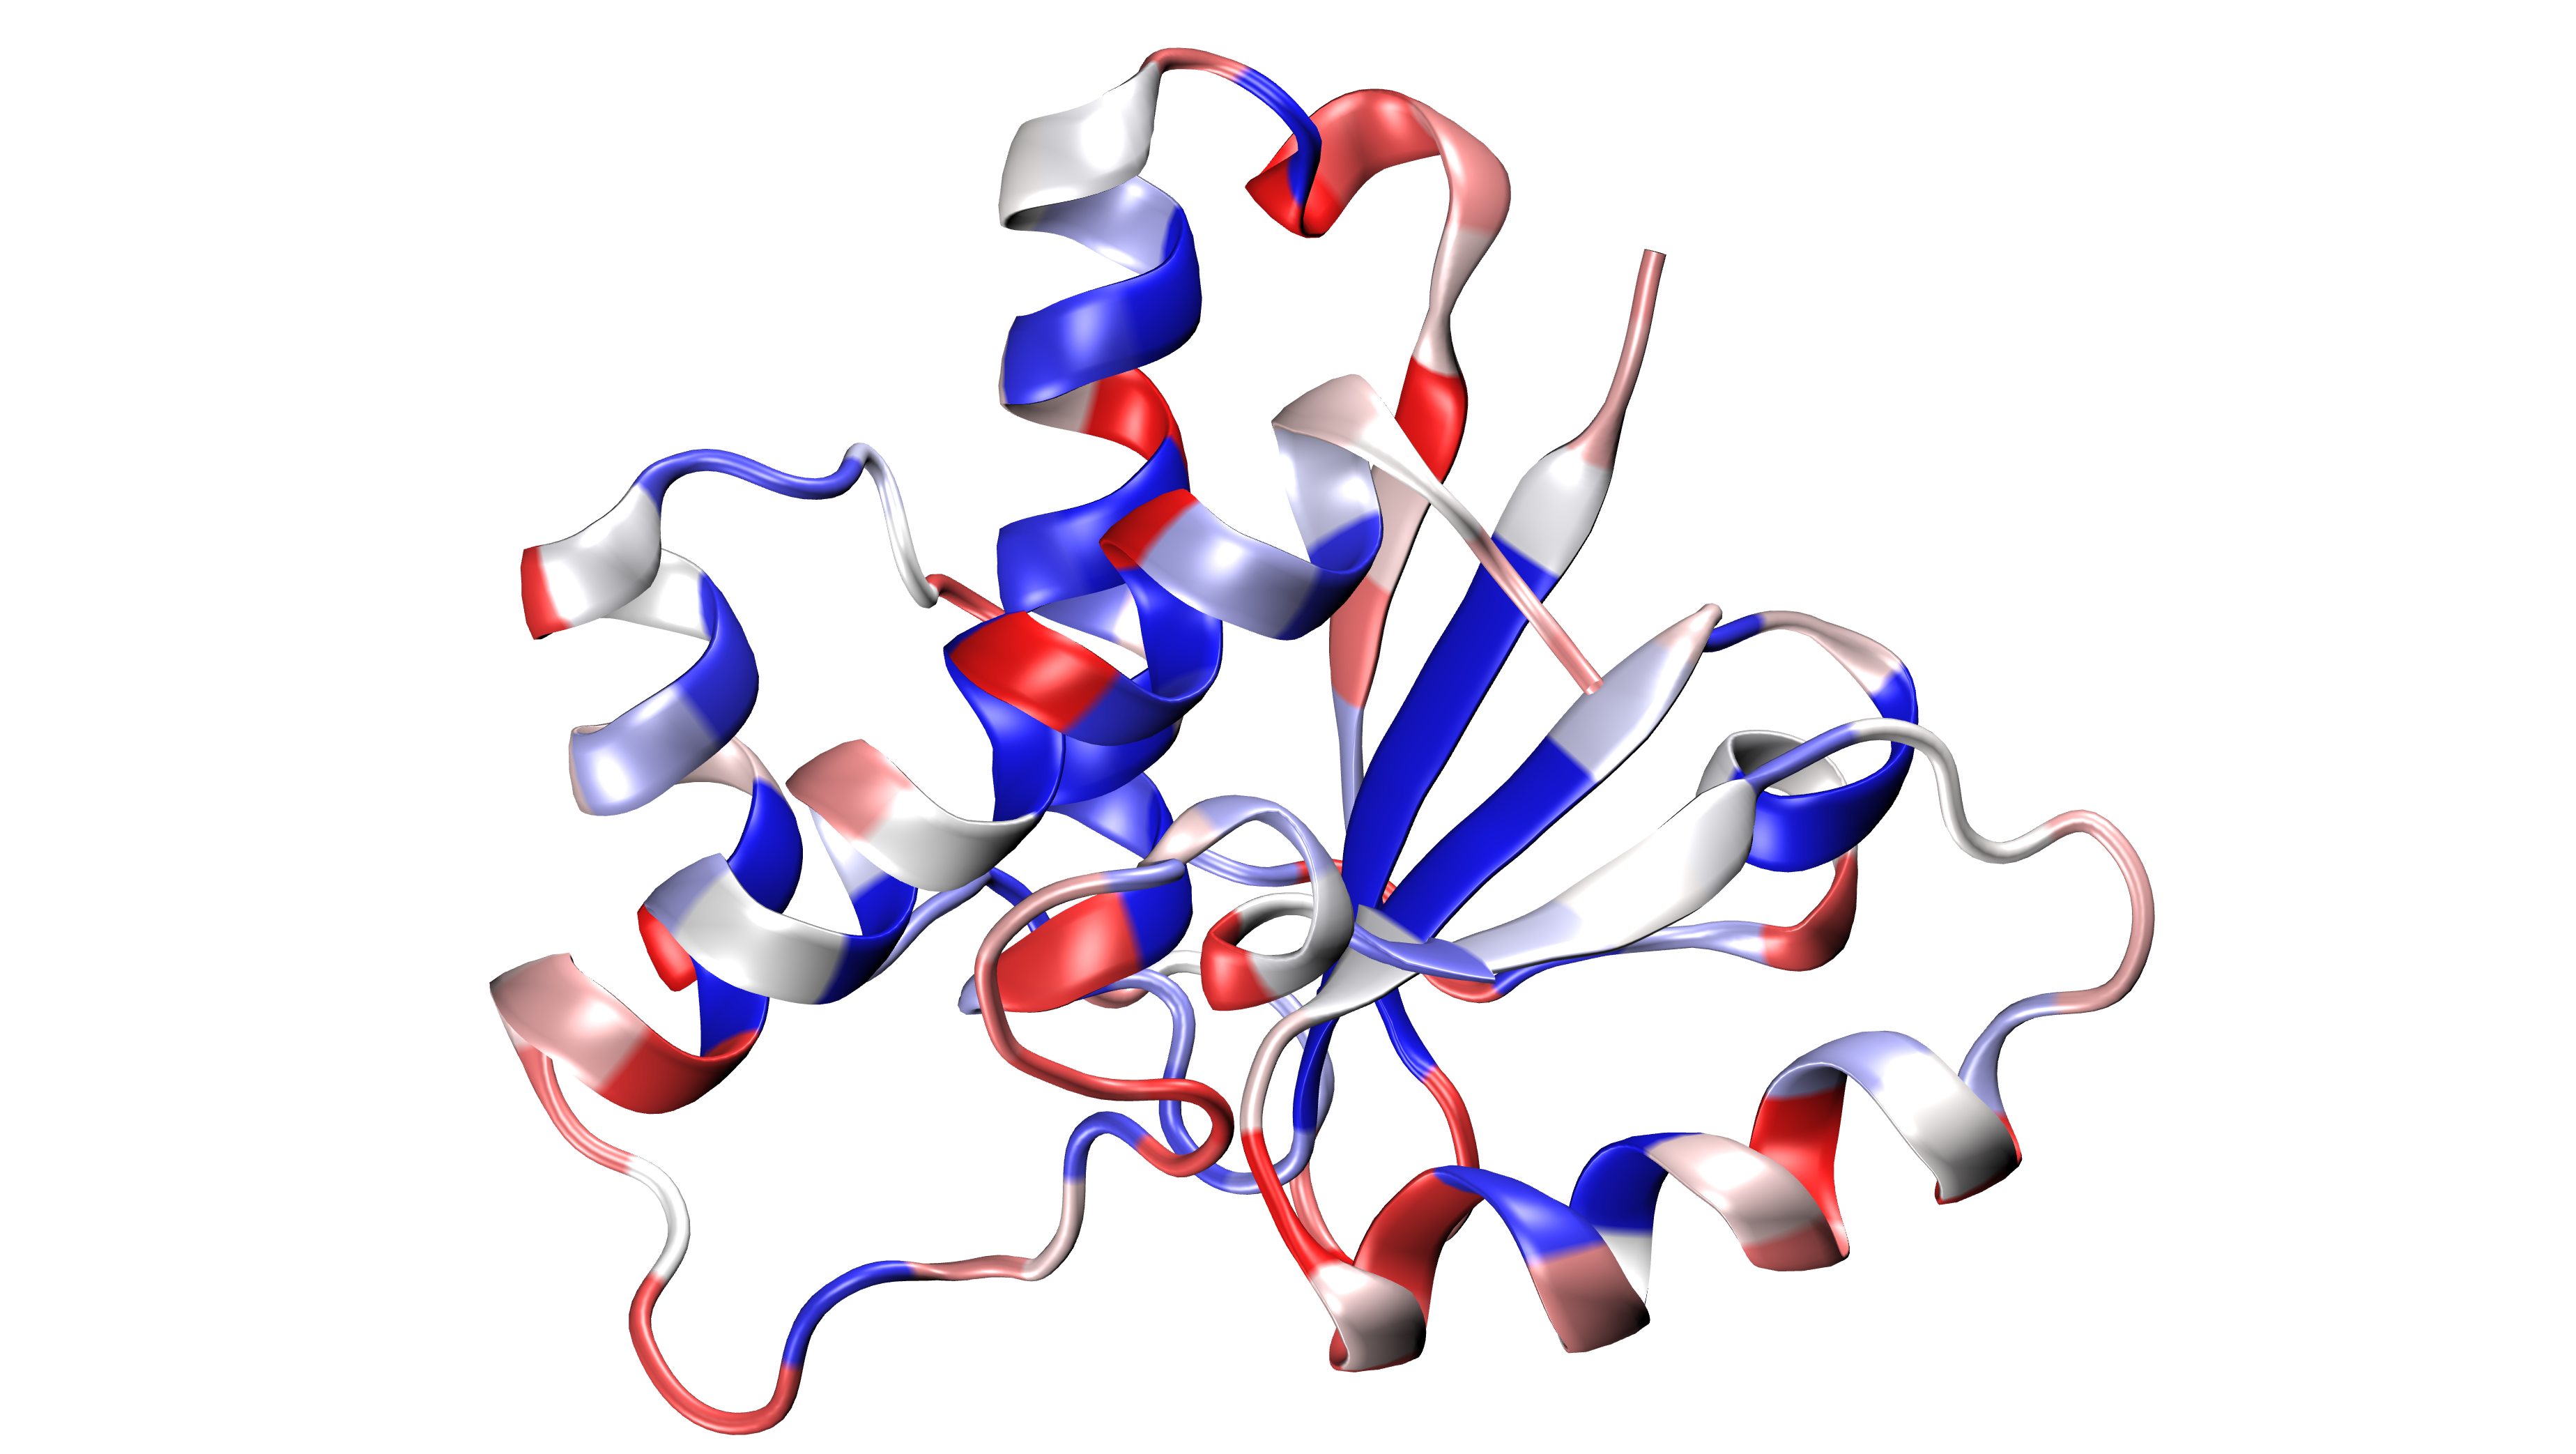

In [39]:
from IPython.display import Image
Image('./Fig2.png', width=600)

--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

## *Water bridges detection in ensemble pdb*

This time we will use multi-model PDB which contain 50 frames
from MD simulations form PE-binding protein 1 (PDB code: *1beh*).
Simulation were performed using NAMD and saved as multi-model PDB
using VMD. Remember to align the protein structure before analyzing
it. Otherwise when all structures will be uploaded to the visualization
program they will be spread out in space.

### Parse structure

In [40]:
ens = 'pebp1_50frames.pdb'
coords_ens = parsePDB(ens)
bridgeFrames_ens = calcWaterBridgesTrajectory(coords_ens, coords_ens)

@> 20195 atoms and 51 coordinate set(s) were parsed in 1.92s.
@> Frame: 0
@> 161 water bridges detected using method chain.
@> Frame: 1
@> 127 water bridges detected using method chain.
@> Frame: 2
@> 168 water bridges detected using method chain.
@> Frame: 3
@> 132 water bridges detected using method chain.
@> Frame: 4
@> 142 water bridges detected using method chain.
@> Frame: 5
@> 166 water bridges detected using method chain.
@> Frame: 6
@> 150 water bridges detected using method chain.
@> Frame: 7
@> 159 water bridges detected using method chain.
@> Frame: 8
@> 147 water bridges detected using method chain.
@> Frame: 9
@> 136 water bridges detected using method chain.
@> Frame: 10
@> 127 water bridges detected using method chain.
@> Frame: 11
@> 135 water bridges detected using method chain.
@> Frame: 12
@> 162 water bridges detected using method chain.
@> Frame: 13
@> 135 water bridges detected using method chain.
@> Frame: 14
@> 178 water bridges detected using method chain.
@> 

Analysis of the results is similar to the one presented in trajectory analysis. 
Below examples showing which residues are the most frequently involved in water 
bridges formation (:func:`.calcBridgingResiduesHistogram`), details of that 
interactions (:func:`.calcWaterBridgesStatistics`), and results saved as PDB 
structure for further visualization (:func:`.savePDBWaterBridgesTrajectory`). 
Other functions can be seen in the analysis of trajectory.

In [41]:
calcBridgingResiduesHistogram(bridgeFrames_ens)

[('VAL34P', 1),
 ('VAL177P', 1),
 ('PRO43P', 1),
 ('LEU41P', 2),
 ('MET92P', 2),
 ('LEU14P', 3),
 ('VAL164P', 3),
 ('TYR169P', 3),
 ('PHE154P', 4),
 ('THR167P', 4),
 ('PRO178P', 4),
 ('LEU25P', 5),
 ('SER104P', 6),
 ('PRO136P', 6),
 ('ILE53P', 7),
 ('GLN170P', 7),
 ('TYR29P', 8),
 ('TYR106P', 8),
 ('PRO50P', 8),
 ('GLY38P', 8),
 ('PRO71P', 9),
 ('LEU138P', 9),
 ('PRO24P', 10),
 ('ASP18P', 10),
 ('LEU103P', 10),
 ('GLN127P', 10),
 ('TYR181P', 11),
 ('ILE137P', 11),
 ('LEU131P', 12),
 ('VAL107P', 12),
 ('TYR158P', 13),
 ('PRO112P', 13),
 ('PRO11P', 13),
 ('PRO74P', 15),
 ('PRO163P', 16),
 ('LEU160P', 16),
 ('HSE85P', 16),
 ('LEU58P', 17),
 ('PRO130P', 17),
 ('LEU184P', 17),
 ('PRO21P', 18),
 ('LEU63P', 19),
 ('ASP35P', 19),
 ('VAL17P', 19),
 ('TYR81P', 20),
 ('GLU36P', 20),
 ('VAL40P', 20),
 ('PRO79P', 20),
 ('HSE86P', 21),
 ('TRP84P', 21),
 ('ASP175P', 23),
 ('GLU159P', 23),
 ('GLY116P', 23),
 ('LEU5P', 23),
 ('GLU172P', 25),
 ('ASP174P', 25),
 ('THR51P', 26),
 ('GLU182P', 26),
 ('GLU19

In [42]:
analysisAtomic_ens = calcWaterBridgesStatistics(bridgeFrames_ens, coords_ens)

for item in analysisAtomic_ens.items():
  print(item)

@> RES1           RES2           PERC      DIST_AVG  DIST_STD  
@> HSE26P         VAL3P          19.608    5.581     0.696     
@> SER6P          ASP4P          13.725    3.817     0.560     
@> LYS7P          SER6P          43.137    4.394     1.114     
@> GLU36P         LYS7P          1.961     6.088     0.000     
@> LEU37P         LYS7P          7.843     6.353     0.433     
@> SER13P         GLY10P         43.137    4.759     0.612     
@> ARG76P         GLY10P         11.765    5.309     0.586     
@> SER13P         LEU12P         45.098    2.767     0.080     
@> GLU16P         SER13P         25.490    4.449     1.133     
@> ASP18P         GLN15P         7.843     3.732     0.174     
@> ARG82P         GLU16P         45.098    4.550     1.086     
@> VAL17P         GLU16P         17.647    3.438     0.952     
@> LYS150P        GLU16P         21.569    5.056     0.929     
@> GLU83P         GLU16P         9.804     5.476     1.138     
@> ALA152P        GLU16P         7.843  

@> LEU12P         LYS7P          27.451    5.669     0.629     
@> LEU14P         LYS7P          5.882     5.741     0.168     
@> GLN20P         TRP8P          35.294    4.703     0.520     
@> LEU14P         LEU12P         3.922     5.162     0.022     
@> GLN15P         SER13P         31.373    3.430     0.596     
@> ARG76P         GLU16P         21.569    6.410     1.366     
@> PRO163P        GLN22P         23.529    4.762     0.440     
@> ARG161P        GLN22P         35.294    7.063     0.843     
@> ASP59P         HSE23P         19.608    7.344     0.513     
@> ASP56P         HSE26P         21.569    6.488     1.088     
@> THR28P         HSE26P         37.255    4.555     0.711     
@> VAL102P        ARG49P         15.686    6.140     0.301     
@> SER98P         ARG49P         54.902    5.731     1.012     
@> ARG119P        PRO71P         17.647    3.921     0.796     
@> LYS80P         ASP72P         23.529    5.698     0.241     
@> TYR120P        PRO74P         1.961  

@> ARG82P         ASP78P         31.373    5.410     0.419     
@> VAL151P        GLU83P         1.961     5.483     0.000     
@> LYS93P         ASN91P         7.843     5.546     0.975     
@> GLU159P        ASP128P        15.686    6.521     0.620     
@> LYS157P        ASP134P        27.451    3.456     1.408     
@> LYS157P        GLU135P        39.216    3.182     0.740     
@> HSE145P        GLY143P        3.922     4.763     0.828     
@> SER153P        LYS150P        31.373    5.890     0.846     
@> PRO163P        ARG161P        5.882     7.053     0.536     
@> PRO163P        ALA162P        11.765    3.149     0.179     
@> GLY186P        TYR181P        5.882     5.387     1.575     
@> SER185P        TYR181P        3.922     4.494     0.036     
@> SER9P          LYS7P          19.608    6.659     1.073     
@> SER9P          TRP8P          64.706    3.396     0.929     
@> LEU12P         SER9P          7.843     5.815     0.231     
@> ARG76P         PRO11P         25.490 

@> ARG76P         SER75P         21.569    3.534     0.227     
@> LYS77P         SER75P         19.608    3.775     0.290     
@> GLN170P        ARG76P         3.922     7.044     0.685     
@> TYR106P        HSE86P         1.961     5.495     0.000     
@> VAL107P        HSE86P         9.804     4.659     0.953     
@> SER109P        TYR106P        1.961     4.453     0.000     
@> LEU117P        GLY116P        19.608    4.024     0.838     
@> CYS133P        LYS132P        15.686    5.371     1.281     
@> ASP134P        CYS133P        5.882     3.440     0.630     
@> LYS150P        HSE145P        11.765    7.014     0.793     
@> PHE149P        HSE145P        3.922     6.609     0.523     
@> PHE149P        GLY147P        1.961     3.631     0.000     
@> GLU159P        TYR158P        3.922     3.951     0.764     
@> GLU182P        TYR181P        3.922     3.016     0.687     
@> ASP56P         VAL3P          35.294    6.213     0.910     
@> LEU14P         GLY10P         3.922  

@> TYR81P         ASP78P         5.882     5.484     0.368     
@> GLU172P        THR115P        3.922     7.386     0.608     
@> GLU182P        LYS179P        29.412    5.239     0.808     
@> GLN45P         THR44P         7.843     5.175     1.802     
@> PRO74P         ASP70P         1.961     7.232     0.000     
@> PRO74P         ALA73P         1.961     4.305     0.000     
@> SER139P        LEU138P        3.922     3.644     1.370     
@> TYR181P        TRP173P        3.922     6.158     0.451     
@> LYS62P         GLY61P         3.922     2.930     0.062     
@> HSE118P        ASP70P         1.961     7.400     0.000     
@> TYR181P        LYS113P        1.961     6.697     0.000     
@> GLU172P        LYS113P        1.961     7.713     0.000     
@> ARG119P        HSE118P        3.922     6.708     0.171     
@> ALA152P        PHE149P        3.922     6.259     0.168     
@> ASP18P         GLU16P         1.961     4.124     0.000     
@> VAL151P        VAL17P         15.686 

@> ASP96P         MET92P         1.961     4.360     0.000     
@> LEU37P         LEU25P         1.961     6.549     0.000     
@> THR167P        LEU37P         1.961     4.236     0.000     
@> HSE118P        SER75P         1.961     7.580     0.000     
@> ARG155P        GLN15P         1.961     8.382     0.000     
@> ALA162P        ASP18P         1.961     7.524     0.000     
@> THR51P         THR28P         1.961     4.348     0.000     
@> TYR64P         LEU58P         1.961     6.039     0.000     
@> LYS132P        ASN91P         1.961     5.260     0.000     
@> LEU184P        GLN183P        1.961     3.313     0.000     


((26, 3), {'percentage': 19.607843137254903, 'distAvg': 5.581385743680688, 'distStd': 0.6957564326481819})
((3, 26), {'percentage': 19.607843137254903, 'distAvg': 5.581385743680688, 'distStd': 0.6957564326481819})
((6, 4), {'percentage': 13.72549019607843, 'distAvg': 3.8172178618552115, 'distStd': 0.5598418865989507})
((4, 6), {'percentage': 13.72549019607843, 'distAvg': 3.8172178618552115, 'distStd': 0.5598418865989507})
((7, 6), {'percentage': 43.13725490196079, 'distAvg': 4.393957173091035, 'distStd': 1.1138722373063479})
((6, 7), {'percentage': 43.13725490196079, 'distAvg': 4.393957173091035, 'distStd': 1.1138722373063479})
((36, 7), {'percentage': 1.9607843137254901, 'distAvg': 6.088490946039092, 'distStd': 0.0})
((7, 36), {'percentage': 1.9607843137254901, 'distAvg': 6.088490946039092, 'distStd': 0.0})
((37, 7), {'percentage': 7.8431372549019605, 'distAvg': 6.352599626812257, 'distStd': 0.43259332105891846})
((7, 37), {'percentage': 7.8431372549019605, 'distAvg': 6.35259962681225

In [43]:
savePDBWaterBridgesTrajectory(bridgeFrames_ens, coords_ens, ens[:-4]+'_ens.pdb')

@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...6074 4190 14360'.
@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...9718 17936 7184'.
@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...947 10043 11756'.
@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...0099 12848 4175'.
@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...6031 8645 18008'.
@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...9784 4394 16031'.
@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...799 18317 20057'.
@> All 51 coordinate sets a

### Detecting water centers

Previous function generated multiple PDB in which we would found protein and 
water molecules for each frame that form water bridges with protein structure. 
Now we can use another function :func:`.findClusterCenters` which will extract 
water centers (they refer to the oxygens from water molecules that are forming 
clusters). We need to provide a file pattern as show below. Now all the files 
with prefix *'pebp1_50frames_ens_'* will be analyzed.

In [44]:
findClusterCenters('pebp1_50frames_ens_*.pdb')

@> 3269 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3161 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3173 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3173 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3218 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3251 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3215 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3230 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3230 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3224 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3158 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3176 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3218 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3284 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3227 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3251 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3233 atoms and 1 coordinate set(s) we

Function generated one PDB file with water centers. We used default values, 
such as distC (distance to other molecule) and numC (min number of molecules 
in a cluster), but those values could be changed if the molecules are more 
widely distributed or we would like to have more numerous clusters.
Moreover, this function can be applied on different type of molecules by using 
*selection* paramater. We can provide the whole molecule and by default 
the center of mass will be used as a reference.

Saved PDB files using :func:`.savePDBWaterBridgesTrajectory` in the previous
step can be upload to VMD or other program for visualization:


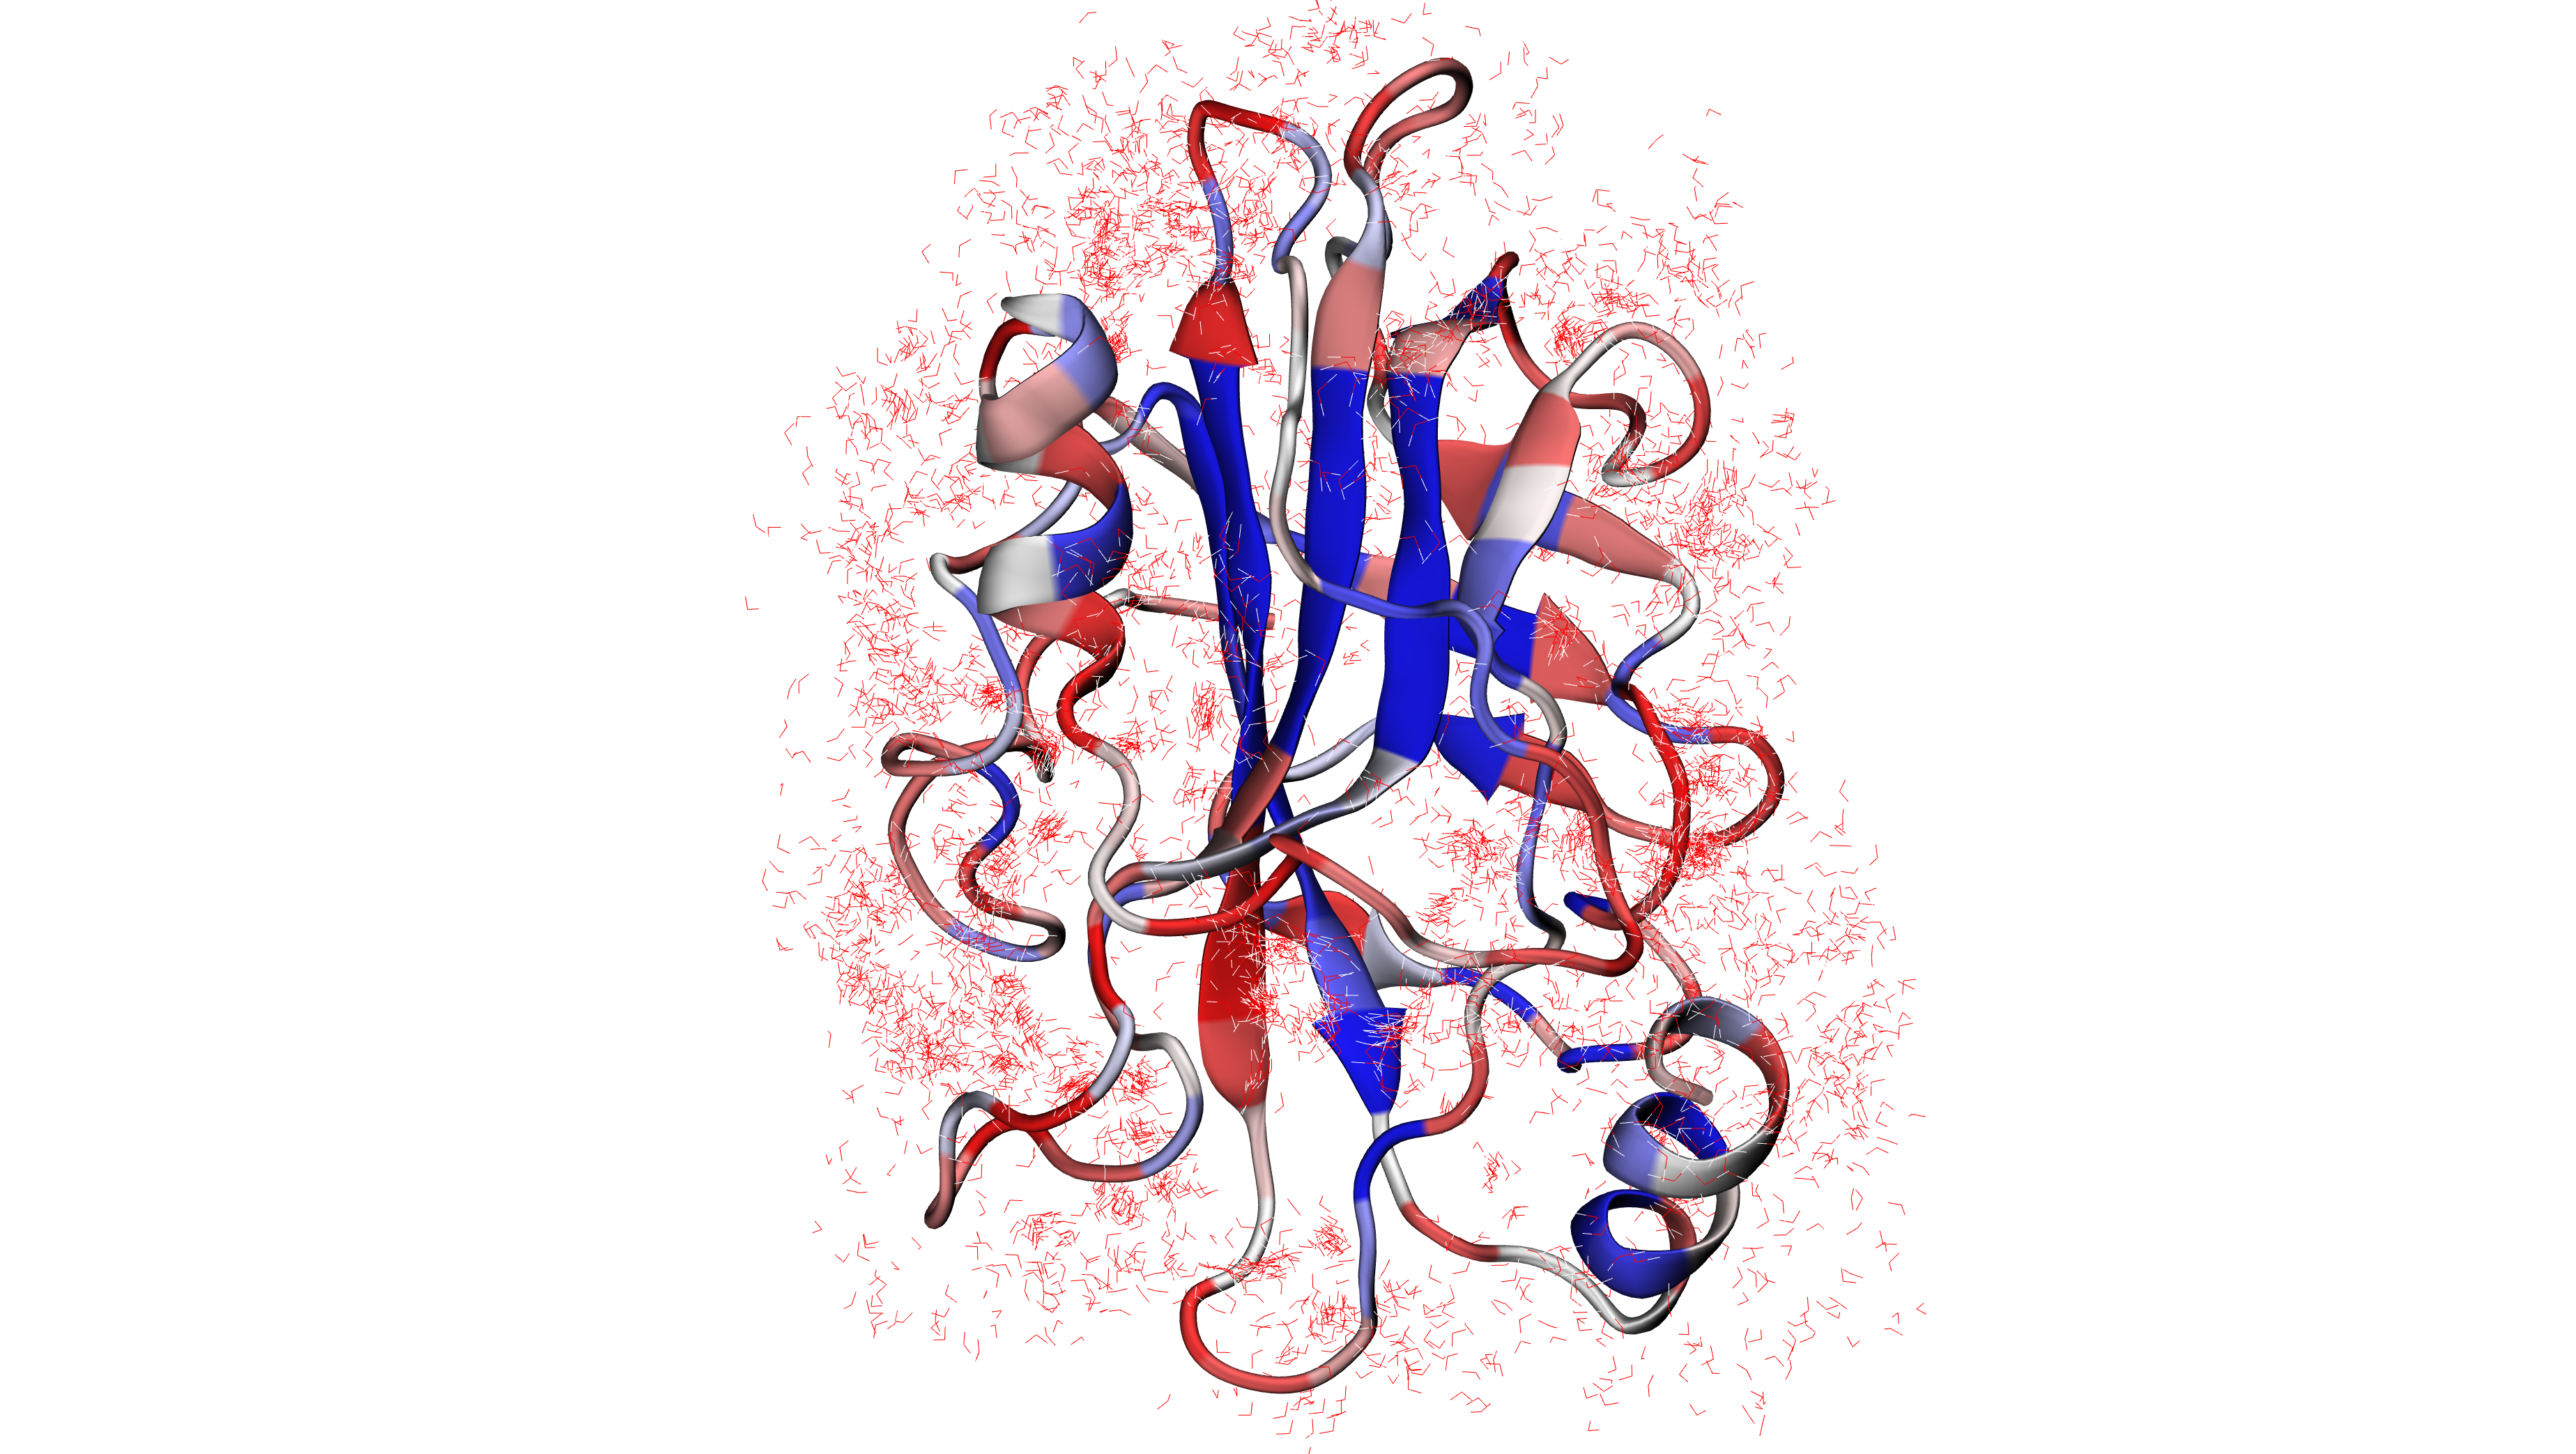

In [45]:
from IPython.display import Image
Image('./Fig3.png', width=800)

After uploading a new PDB file with water centers we can see the results as
follows:

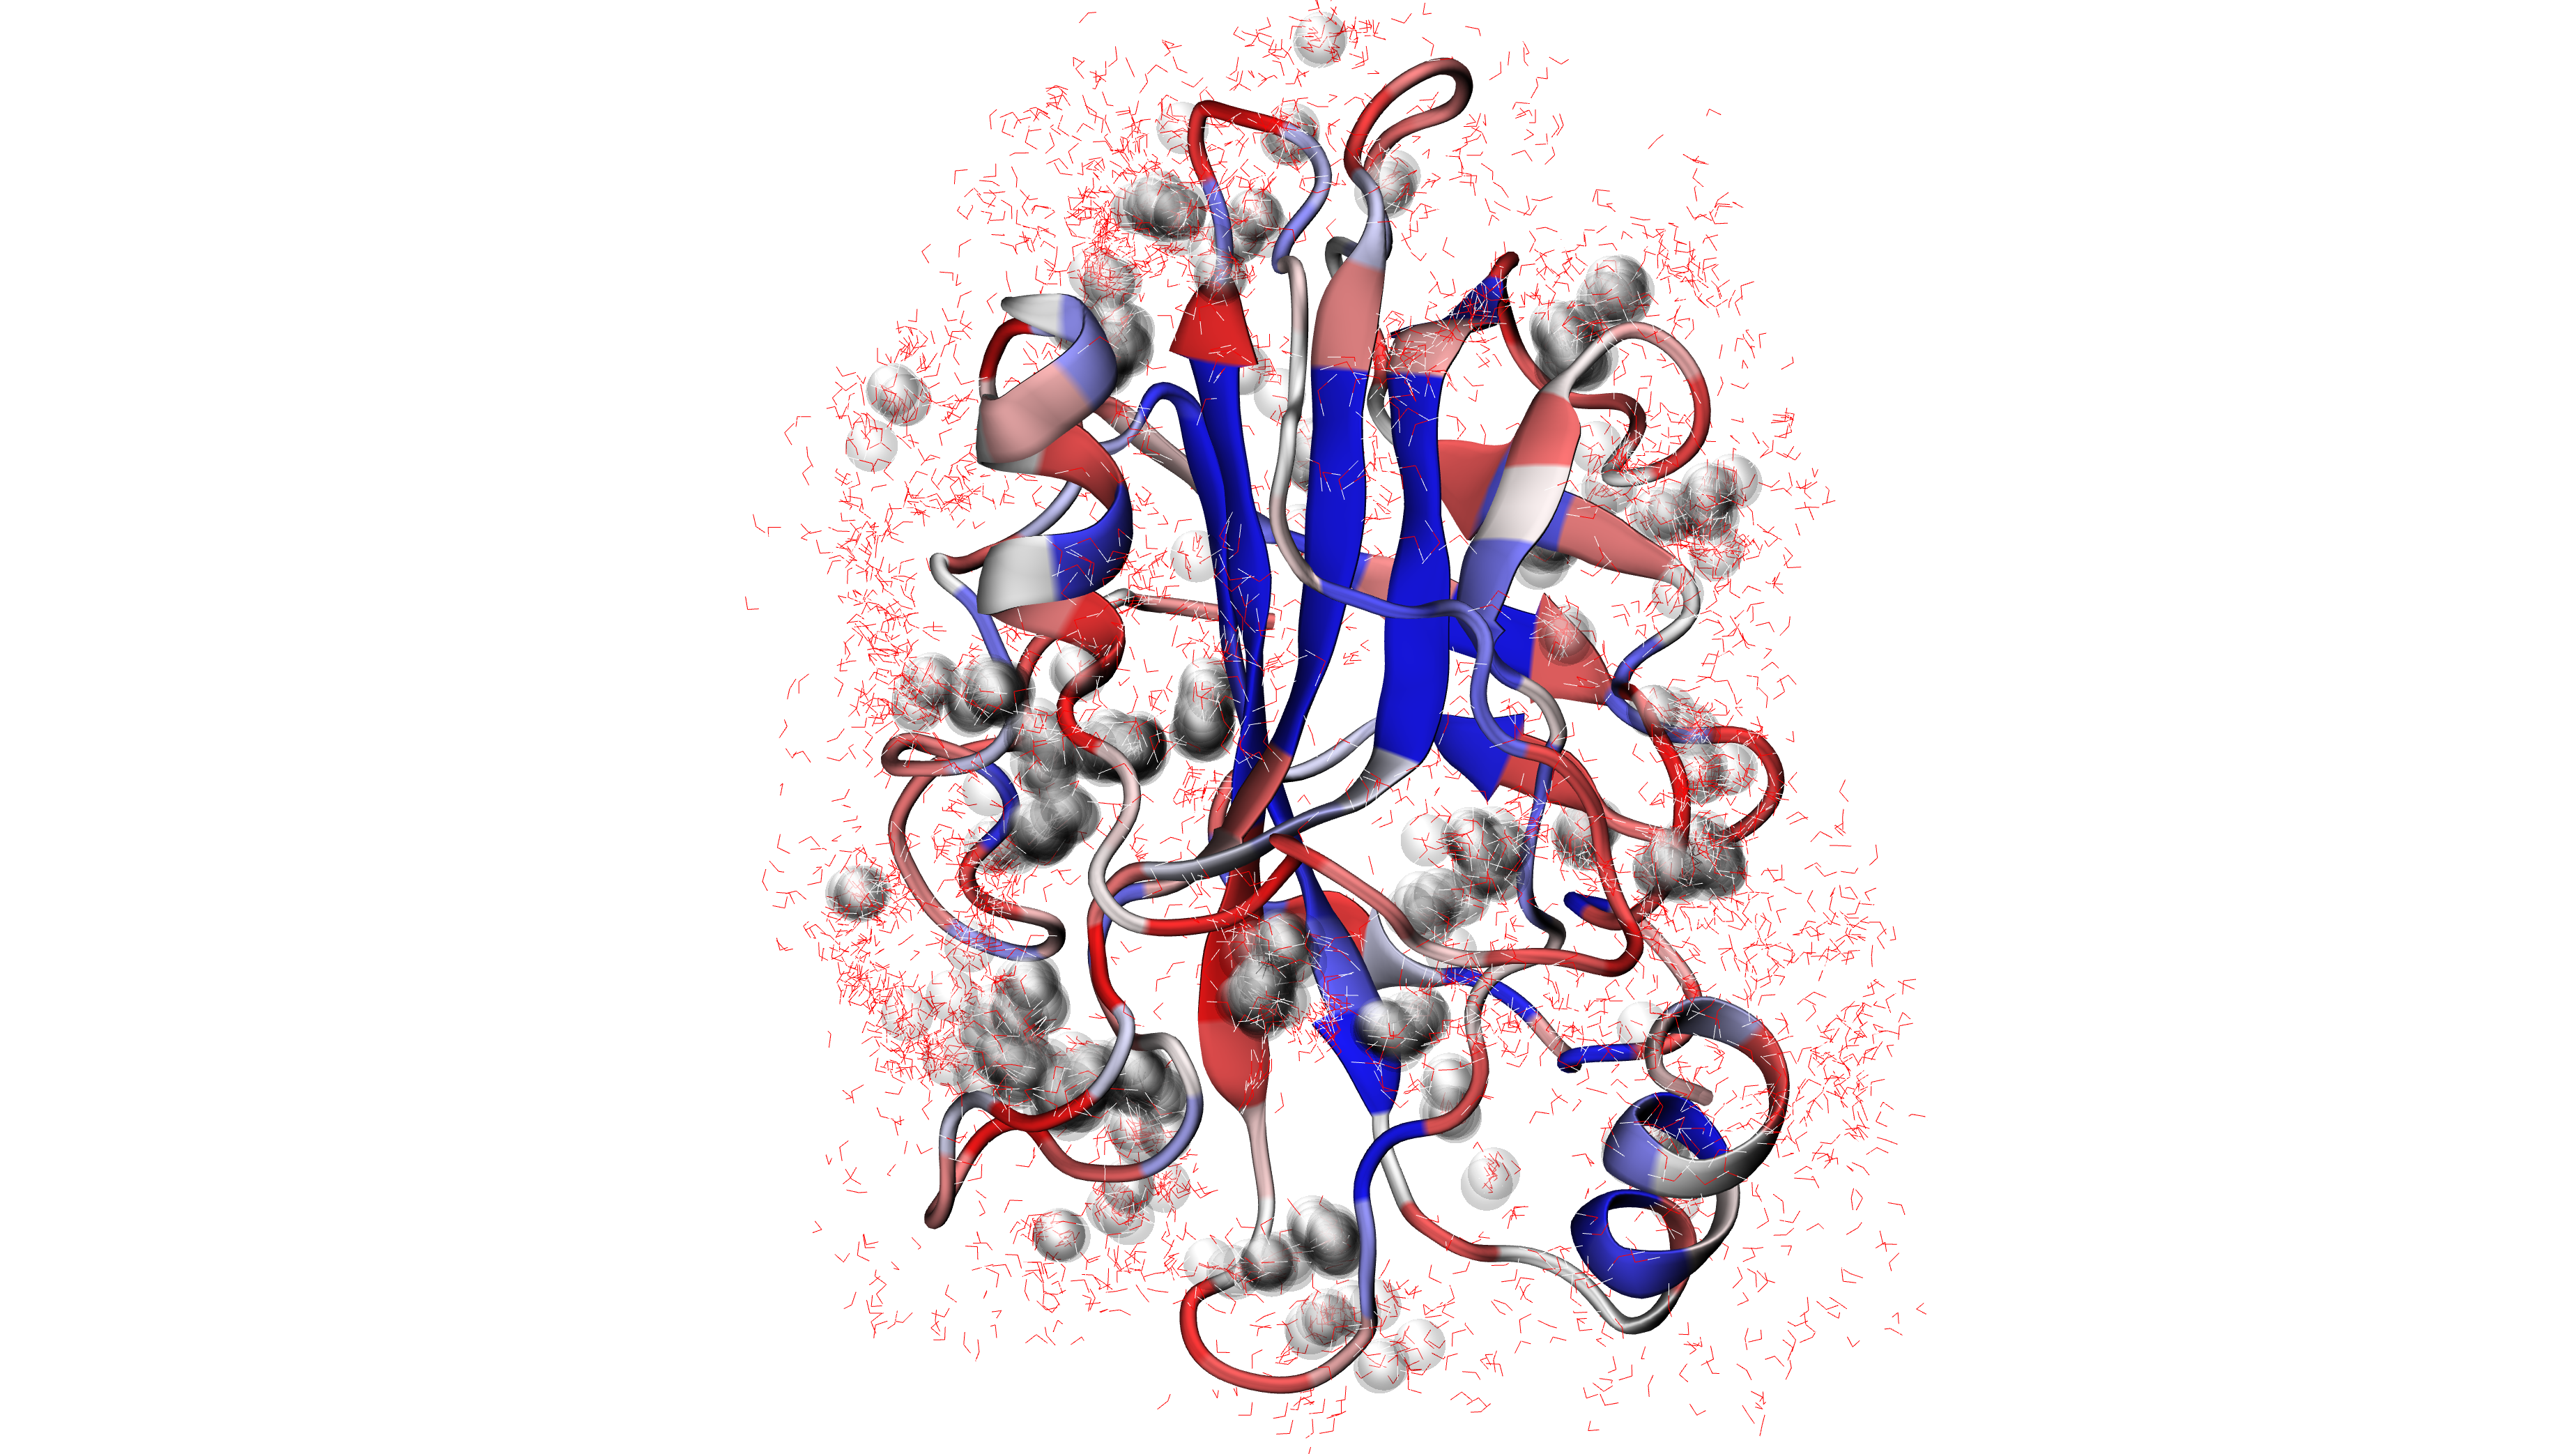

In [46]:
from IPython.display import Image 
Image('./Fig4.png', width=800)

--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

## Changes in the default parameters

There are a lot of paramaters that can be changed in the water bridges
analysis including the distances, angles and the number of involved
water molecules or residues.

:arg **atoms**: Atomic object from which atoms are considered

:arg **method**: cluster or chain, where chain find shortest water bridging path between two protein atoms
    default is 'chain'

:arg **distDA**: maximal distance between water/protein donor and acceptor
    default is 3.5

:arg **distWR**: maximal distance between considered water and any residue
    default is 4

:arg **anglePDWA**: angle range where protein is donor and water is acceptor
    default is (100, 200)

:arg **anglePAWD**: angle range where protein is acceptor and water is donor
    default is (100, 140)

:arg **angleWW**: angle between water donor/acceptor
    default is (140, 180)

:arg **maxDepth**: maximum number of waters in chain/depth of residues in cluster
    default is 2

:arg **maxNumRes**: maximum number of water+protein residues in cluster
    default is None

:arg **donors**: which atoms to count as donors 
    default is ['N', 'O', 'S', 'F']

:arg **acceptors**: which atoms to count as acceptors 
    default is ['N', 'O', 'S', 'F']

:arg **output**: return information arrays, (protein atoms, water atoms), or just atom indices per bridge
    default is 'atomic'
:type output: 'info' | 'atomic' | 'indices'

:arg **isInfoLog**: should log information
    default is True

In [47]:
waterBridges_2 = calcWaterBridges(atoms, method='cluster', distWR=3.0, distDA=3.2, maxDepth=3)

@> 21 water bridges detected using method cluster.
@> ASP86 OD2_641 A SER7 OG_21 A LYS110 NZ_838 A 3.379157587328534 4.910793418583194 4.70722699686344 1 ['A_1316']
@> PRO20 O_115 A GLU23 OE1_139 A 4.571172934816621 1 ['A_1292']
@> GLU23 OE2_140 A HIS72 ND1_523 A 4.127239392136104 1 ['A_1244']
@> ASP42 OD2_301 A ARG40 NH2_286 A 5.163938516287738 1 ['A_1246']
@> ASP81 OD1_598 A THR84 OG1_621 A ARG40 NH2_286 A 4.415462942886057 4.365525627000715 3.9229717052255175 1 ['A_1262']
@> ASP42 OD1_300 A ASP42 OD2_301 A 2.1902312663278267 1 ['A_1272']
@> ASP42 OD1_300 A ASP42 OD2_301 A 2.1902312663278267 1 ['A_1272']
@> SER47 O_328 A GLU50 N_347 A TYR49 N_335 A 5.10489901956934 3.6931288902501094 2.8353615289765086 1 ['A_1274']
@> SER47 O_328 A GLU50 N_347 A TYR49 N_335 A 5.10489901956934 3.6931288902501094 2.8353615289765086 1 ['A_1274']
@> GLU50 OE2_355 A TYR131 OH_1009 A 5.157987010452818 1 ['A_1299']
@> ARG65 NH2_473 A ASP135 O_1037 A 4.820906553751068 1 ['A_1267']
@> GLU23 OE2_140 A HIS72 ND